In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#data import
parquet_file = 'TCV_LHD_db4ML.parquet.part'
df = pd.read_parquet(parquet_file, engine ='auto')

In [5]:
df.head()

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0206,30409.787109,1.816398,4.077222e+18,0.0,Ip<Ip_MIN,1.0
1,0.0207,30882.741994,1.992211,4.092746e+18,0.0,Ip<Ip_MIN,1.0
2,0.0208,31355.696879,2.016582,4.116485e+18,0.0,Ip<Ip_MIN,1.0
3,0.0209,31856.508747,1.943354,4.101001e+18,0.0,Ip<Ip_MIN,1.0
4,0.0210,32357.321558,1.860389,4.185470e+18,0.0,Ip<Ip_MIN,1.0


In [6]:
df['LDH'].values.describe() # values in column LDH

,counts,freqs
categories,,
Ip<Ip_MIN,56371,0.021553
L,1573846,0.601745
D,153393,0.058648
H,830940,0.317702
NaN,921,0.000352


In [7]:
# drop NaN and Ip<Ip_MIN values 

mask = df['LDH'] == 'Ip<Ip_MIN'
df_filter = df.drop(index = df[mask].index) #remove Ip<Ip_MIN values 

df_filter = df_filter.dropna() #remove Nan values
df_filter = df_filter.reset_index(drop=True) #reset indexing
df_filter.LDH = df_filter.LDH.cat.remove_categories('Ip<Ip_MIN') #remove Ip<Ip_MIN category

discard_data = len(df.index) - len(df_filter.index) # number of data point that do not contain useful information
print('number of useless data points: ', discard_data)
print('size of original data set: ', len(df.index))
print('size of filtered data set: ', len(df_filter.index))

print(len(df_filter.index) + discard_data - len(df.index)) # this must be zero

number of useless data points:  57292
size of original data set:  2615471
size of filtered data set:  2558179
0


In [8]:
print('data statistical description of filtered data set')
df_filter.describe()

data statistical description of filtered data set


,time,IP,PD,FIR,WP,pulse
count,2.558179e+06,2.558179e+06,2.558179e+06,2.558179e+06,2.558179e+06,2.558179e+06
mean,8.300574e-01,-1.703073e+05,1.930182e+00,3.107381e+19,9.320774e+03,8.873787e+01
std,5.228170e-01,1.452520e+05,1.518472e+00,1.507207e+19,6.458745e+03,4.974847e+01
min,1.170008e-02,-4.633848e+05,7.812500e-02,-6.358192e+19,-1.856671e+04,1.000000e+00
25%,3.922000e-01,-2.225196e+05,8.569957e-01,2.071186e+19,4.918984e+03,4.700000e+01
50%,7.734000e-01,-1.813842e+05,1.532615e+00,2.903146e+19,7.683864e+03,8.700000e+01
75%,1.217000e+00,-1.426401e+05,2.587672e+00,3.923817e+19,1.320854e+04,1.320000e+02
max,2.530600e+00,5.219116e+05,1.000000e+01,1.196714e+20,4.367435e+04,1.720000e+02


In [9]:
print('values in LDH column') # to make sure removing actually works
df_filter['LDH'].values.describe() # values in column LDH

values in LDH column


,counts,freqs
categories,,
L,1573846,0.615221
D,153393,0.059962
H,830940,0.324817


[None, None, None, None, None, None, None, None, None, None, None, None]

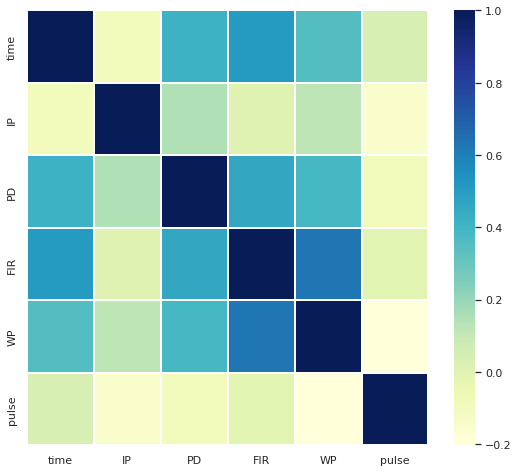

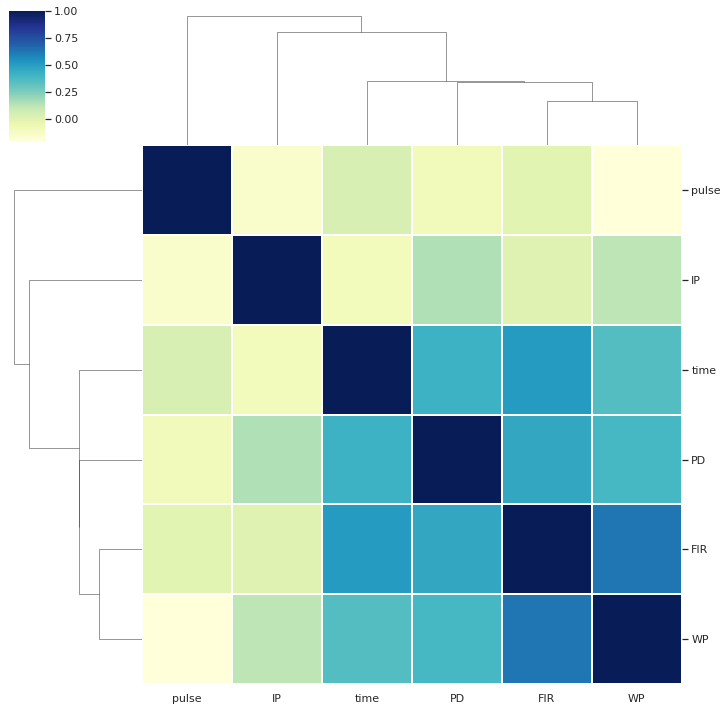

In [10]:
# correlation matrices
corrmat = df_filter.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

In [11]:
df_filter.head(20)

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0
5,0.0262,51249.283764,1.787121,5.162969e+18,0.0,L,1.0
6,0.0263,51450.448646,1.831069,5.140731e+18,0.0,L,1.0
7,0.0264,51651.615163,1.811499,5.144654e+18,0.0,L,1.0
8,0.0265,51903.143595,1.782249,5.148741e+18,0.0,L,1.0
9,0.0266,52154.676446,1.875012,5.144498e+18,0.0,L,1.0


In [12]:
### PCA computation WHOLE DATA SET once it is filtered#
### we do not use time, pulse and LDH to compute the actual PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# features to keep and to discard
features = df_filter.keys().to_numpy()
#mask_features_1 = features != 'LDH'
# we remove time,pulse and LDH 
mask_features = np.array([False, True, True, True, True, False, False ])

features = features[mask_features]
print('features in PCA computation', features)

#separate features
x = df_filter.loc[:, features].values
y = df_filter.loc[:,['LDH']].values
x = StandardScaler().fit_transform(x) # Standardizing the features
print(x.shape) # dimension of features
print(y.shape) # dimension of labels

# safety check, std = 0 and mean = 0 for each FEATURE
for i in range(x.shape[1]):
    print('feature: ', features[i])
    print('mean: ',   x[:, i ].mean()) # this must be zero or close to zero since we normalize the datsa
    print('std: ',   x[:, i ].std()) # this must be 1 or close to 1 since we normalize the datsa
    print('-----')

features in PCA computation ['IP' 'PD' 'FIR' 'WP']
(2558179, 4)
(2558179, 1)
feature:  IP
mean:  1.068528170303382e-15
std:  0.9999999999999999
-----
feature:  PD
mean:  1.5092004934080378e-16
std:  1.0000000000000002
-----
feature:  FIR
mean:  -1.9627605710205946e-15
std:  1.0000000000000002
-----
feature:  WP
mean:  7.439345188354108e-17
std:  0.9999999999999991
-----


In [13]:
# actual computation of PCA in 2 dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2']) # PC stands for principal component

# each row in the following corresponds to a data sample projected into the lower dimensional space
finalDf = pd.concat([principalDf, df_filter[['LDH']]], axis = 1) # create new data frame from PCA, 

In [14]:
finalDf.shape
finalDf.head()

,PC 1,PC 2,LDH
0,-1.711867,1.988185,L
1,-1.704170,1.991169,L
2,-1.626925,2.005754,L
3,-1.671519,1.997700,L
4,-1.681260,1.996846,L


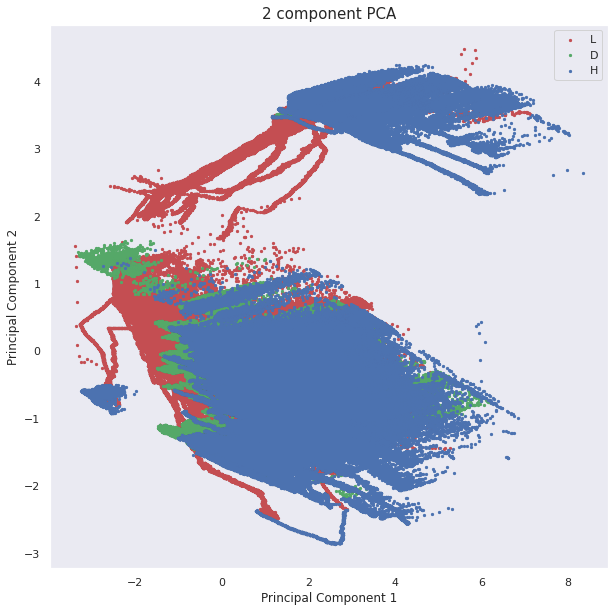

In [15]:
# PCA visualialization for the whole data set filtered
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['L', 'D', 'H',] # labels
colors = ['r', 'g', 'b',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LDH'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [16]:
## PCA in 3D of the whole data set
pca3 = PCA(n_components=3)

principalComponents3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['PC 1', 'PC 2', 'PC 3'])
# each row in the following corresponds to a data sample projected into the lower dimensional space
finalDf3 = pd.concat([principalDf3, df_filter[['LDH']]], axis = 1)# create new data frame from PCA,  
finalDf3.head()

,PC 1,PC 2,PC 3,LDH
0,-1.711867,1.988185,0.697943,L
1,-1.704170,1.991169,0.708086,L
2,-1.626925,2.005754,0.824166,L
3,-1.671519,1.997700,0.748415,L
4,-1.681260,1.996846,0.732136,L


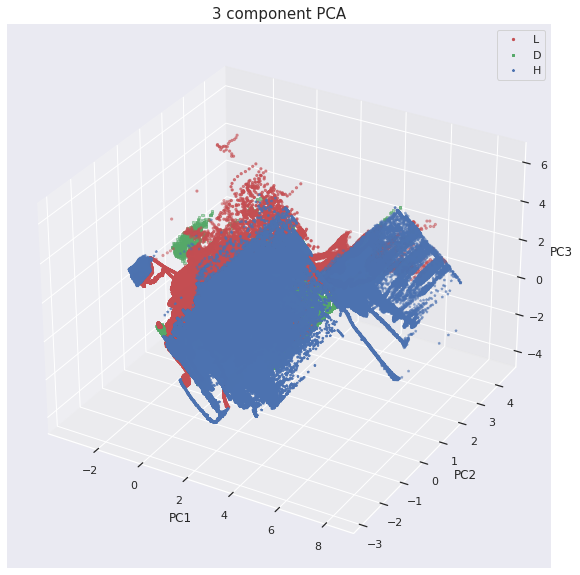

In [17]:
## NOTE: this plot may be time computationally expensive
## PCA in 3D plot. 
## there is not a clear distinction among data points
## but there is a clear clustering of the points

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PC1", fontsize = 12)
ax.set_ylabel("PC2", fontsize = 12)
ax.set_zlabel("PC3", fontsize = 12)
ax.set_title('3 component PCA', fontsize = 15)

targets = ['L', 'D', 'H',] # labels to predict
colors = ['r', 'g', 'b',]
marker = ['o', 's', '*']
i = 0
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['LDH'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC 1']
               , finalDf3.loc[indicesToKeep, 'PC 2']
               , finalDf3.loc[indicesToKeep, 'PC 3']
               , c = color
               #, edgecolor="k"
               , marker = marker[i]
               , s = 5)
    i += 1
    
ax.legend(targets)
ax.grid()

In [18]:
# see number of pulse values and then compue the PCA for a fixed experiement
#df_filter.pulse.value_counts()
df_filter.pulse.value_counts().sort_index()
#array_exp = df_filter.pulse == 4 # this must give 5834
#array_exp.value_counts()

1.0      20075
2.0      13539
3.0      18477
4.0       5834
5.0      18470
         ...  
168.0    24956
169.0    23790
170.0    15860
171.0    16539
172.0    16399
Name: pulse, Length: 172, dtype: int64

In [19]:
# PCA for a FIXED EXPERIMENT
# for each experiment there is a clustering patter
# change number of experiment to visualize its PCA
experiment_number = 170 # this should be between 1 and 172. We have 172 experiments (pulses) in the original whole data set
mask_experiment = df_filter.pulse == experiment_number #experiment number 
df_experiment = df_filter[mask_experiment]
df_experiment = df_experiment.reset_index(drop=True)
df_experiment.shape

# features mask
features_exp = df_experiment.keys().to_numpy()
mask_features_exp = np.array([False, True, True, True, True, False, False ])

features_exp = features_exp[mask_features_exp]
print('features in PCA computation', features_exp)

#separate features from labels
x_exp = df_experiment.loc[:, features_exp].values
y_exp = df_experiment.loc[:,['LDH']].values
x_exp = StandardScaler().fit_transform(x_exp) # Standardizing the features

print(x_exp.shape) # dimension of features
print(y_exp.shape) # dimension of labels

pca = PCA(n_components=2)
principalComponents_exp = pca.fit_transform(x_exp)
principalDf_exp = pd.DataFrame(data = principalComponents_exp, columns = ['principal component 1', 'principal component 2'])

finalDf_exp = pd.concat([principalDf_exp, df_experiment[['LDH']]], axis = 1)

features in PCA computation ['IP' 'PD' 'FIR' 'WP']
(15860, 4)
(15860, 1)


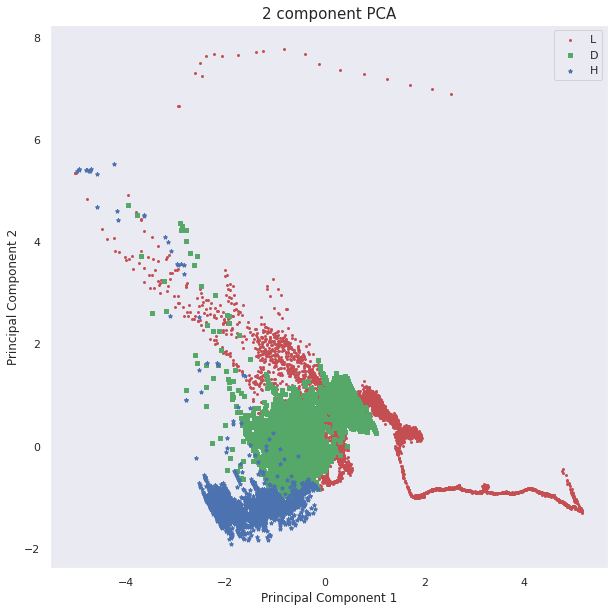

In [20]:
# PCA visualization
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['L', 'D', 'H',] # labels to predict
colors = ['r', 'g', 'b',]
marker = ['.', 's', '*']
i = 0
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_exp['LDH'] == target
    ax.scatter(finalDf_exp.loc[indicesToKeep, 'principal component 1']
               , finalDf_exp.loc[indicesToKeep, 'principal component 2']
               , c = color
               , marker = marker[i]
               , s = 15)
    i +=1
ax.legend(targets)
ax.grid()

In [21]:
# PCA in 3D for FIXED EXPERIMENT
# change number of experiment to visualize its PCA
experiment_number = 170 # this should be between 1 and 172. We have 172 experiments (pulses) in the original whole data set
mask_experiment = df_filter.pulse == experiment_number #experiment number 
df_experiment = df_filter[mask_experiment]
df_experiment = df_experiment.reset_index(drop=True)
df_experiment.shape

# features mask
features_exp = df_experiment.keys().to_numpy()
mask_features_exp = np.array([False, True, True, True, True, False, False ])
features_exp = features_exp[mask_features_exp]

#separate features from labels
x_exp = df_experiment.loc[:, features_exp].values
y_exp = df_experiment.loc[:,['LDH']].values

X_Scale  = StandardScaler().fit_transform(x_exp)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df_experiment[['LDH']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,LDH
0,5.000576,-0.981052,3.108487,L
1,5.013657,-1.016800,3.071070,L
2,4.982787,-0.961941,3.092276,L
3,4.993790,-1.002368,3.063589,L
4,5.033272,-1.094487,3.006773,L


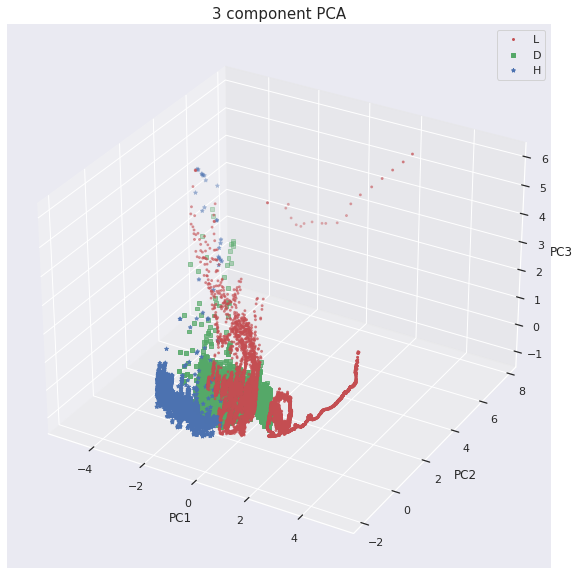

In [22]:
# Plot initialisation
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PC1", fontsize = 12)
ax.set_ylabel("PC2", fontsize = 12)
ax.set_zlabel("PC3", fontsize = 12)
ax.set_title('3 component PCA', fontsize = 15)

targets = ['L', 'D', 'H',] # labels to predict
colors = ['r', 'g', 'b',]
marker = ['.', 's', '*']
i = 0
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LDH'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               #, edgecolor="k"
               , marker = marker[i]
               , s = 15)
    i += 1
    
ax.legend(targets)
ax.grid()

In [23]:
### -----------------------------------------------------------
### Plot of data using time column WHOLE DATA SET once it is filtered

In [24]:
df_filter.head()

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0


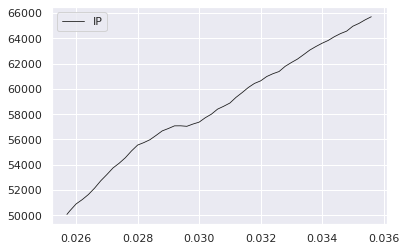

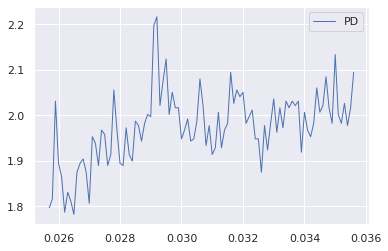

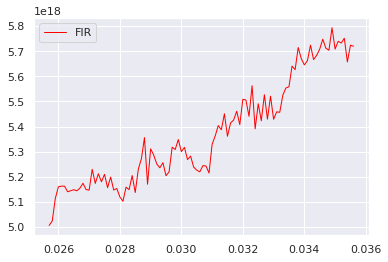

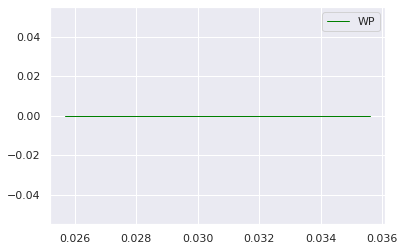

In [25]:
# plot of quantities vs time every 100 time steps
interval_plot = 100
plt.plot(df_filter.time[:interval_plot:], df_filter.IP[:interval_plot:], ls = '-', lw = 0.80, c = 'k', label ='IP')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.PD[:interval_plot:], ls = '-', lw = 1, c = 'b', label ='PD')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.FIR[:interval_plot:], ls = '-', lw = 1, c = 'red', label ='FIR')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.WP[:interval_plot:], ls = '-', lw = 1, c = 'green', label ='WP')
plt.legend()
plt.show()

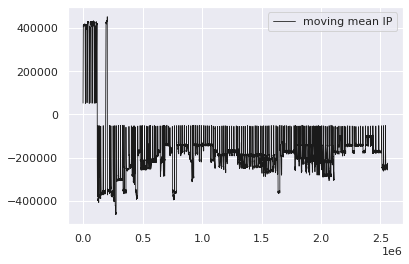

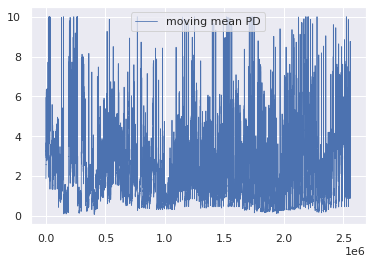

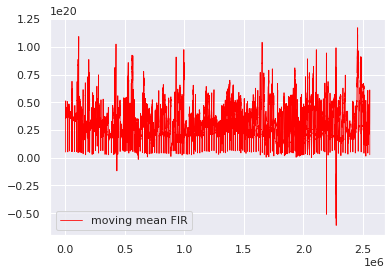

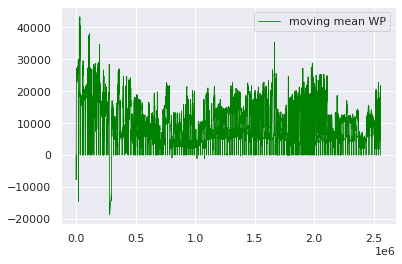

In [26]:
# plot moving average
# rolling average
step_average = 20

plt.plot(df_filter.IP.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'k', label ='moving mean IP')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.PD.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'b', label ='moving mean PD')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.FIR.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'red', label ='moving mean FIR')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.WP.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'green', label ='moving mean WP')
plt.legend(loc = 'best')
plt.show()

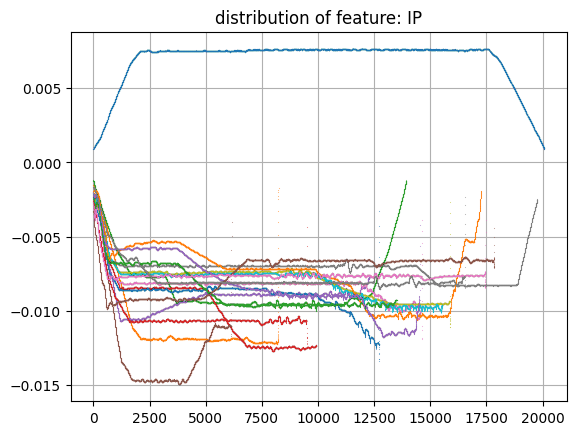

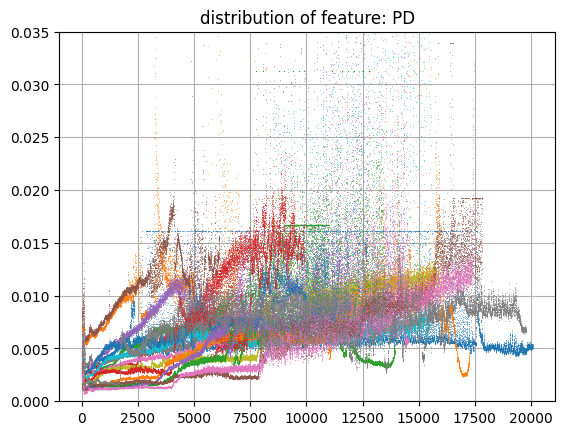

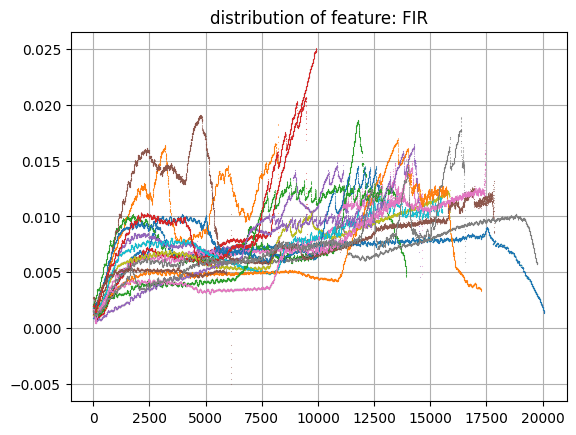

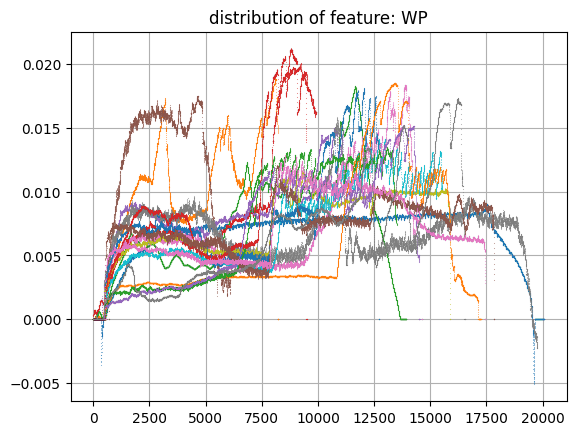

In [92]:
# plot distribution of a fixed feature for some experiments:here print one distribution 
# every 10 esperiments
import matplotlib
matplotlib.rc_file_defaults() # reset matplotlib setting

features_plot = 4
total_pulses = 172
for k in range(features_plot): 
    for i in range(0,total_pulses,10):
        experiment_number = i + 1 # this should be between 1 and 172. We have 172 experiments (pulses) in the original whole data set
        mask_experiment = df_filter.pulse == experiment_number #experiment number 
        df_experiment = df_filter[mask_experiment]
        df_experiment = df_experiment.reset_index(drop=True)
        df_experiment.shape

        # features mask
        features_exp = df_experiment.keys().to_numpy()
        mask_features_exp = np.array([False, True, True, True, True, False, False ])
        features_exp = features_exp[mask_features_exp]

        #separate features from labels
        x_exp = df_experiment.loc[:, features_exp].values
        
        y=x_exp[:, k ]/ np.linalg.norm(x_exp[:, k])
        plt.plot( y, ls = 'None', lw = '0.8', marker= 'x', ms = 0.1)
        if(k==1):
            plt.ylim([-0.00, 0.035])
        plt.title('distribution of feature: ' + features_exp[k])
    
    plt.grid(True)
    plt.show()

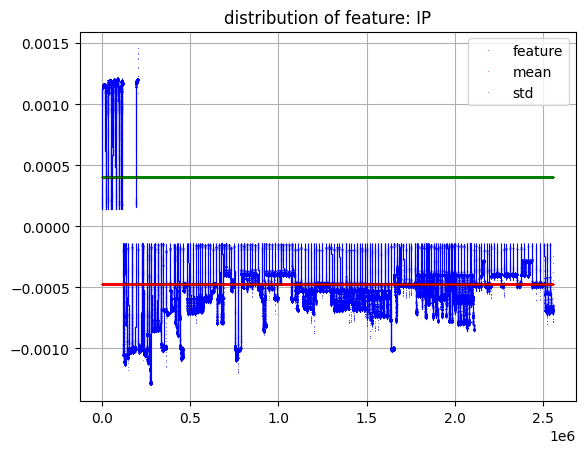

In [ ]:
#distribution for each feature, using the WHOLE DATA SET
matplotlib.rc_file_defaults() # reset matplotlib setting
features_plot = 4
for j in range(features_plot): 
    y=df_filter[features_exp[j]]/ np.linalg.norm(df_filter[features_exp[j]])
    m=np.mean(y)
    mv=[m]*len(y)
    std=np.std(y)
    stdv=[std]*len(y)

    plt.plot((y), ls = 'None', lw = '0.8', marker= 'x', ms = 0.1,c = 'blue',label='feature')
    plt.plot((mv), ls = 'None', lw = '0.8', marker= 'x', ms = 0.1,c = 'red',label='mean')
    plt.plot((stdv), ls = 'None', lw = '0.8', marker= 'x', ms = 0.1,c = 'green',label='std')
    
    plt.title('distribution of feature: ' + features_exp[j])
    plt.grid(True)
    plt.legend(loc = 'best')
    plt.show()
